<a href="https://colab.research.google.com/github/maberf/colabs/blob/main/DerivativosEx3Av2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CURSO MASTERS 2024-02
# Disciplina: DERIVATIVOS
# Professor: ANDRE MAIALY
# Exercício: ATIVIDADE 3 A - Simulações de Monte Carlo - Derivativos e Forwards
# Alunos(s): MABER FERNANDES, LUCAS CORREA, PRISCILLA CARVALHO

In [ ]:
# importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns

In [ ]:
# inputs - variáveis e valores
to = 0
so = 100 # valor inicial do underlying
mi = 0.20 # valor de média em numérico de %
sigma = 0.40 # valor da volatilidade em numérico de %
t = 1 # período em anos
k = 100 # strike

In [ ]:
# parâmetros adicionais para a simulação do exercício
dt = 1/252 # base dia para ano base 252
flows = 100 # quantidade de fluxos
#
data = {'N': range(t*(252+1))} # 1 incremento a mais para fechar em ano(s)

In [ ]:
# criação do dataframe
df = pd.DataFrame(data)
# carregamento da coluna com os incrementos de tempo
df['t'] = df['N'] * dt
# print(df)

<ipython-input-42-d68466738714>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[flow] = calclist
<ipython-input-42-d68466738714>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[flow] = calclist


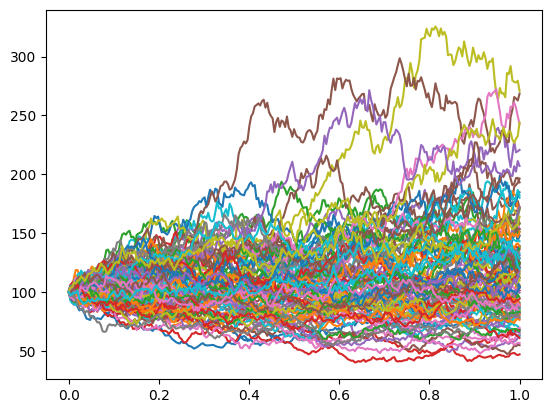

In [ ]:
# recorrências aninhadas, fluxos, cálculos, carregamento do dataframe e plotagem dos fluxos
# fluxos
for s in range(0, flows):
    # criação de uma lista vetor para cálculo dos fluxos com valores iniciais
    calclist = []
    st = so
    calclist.append(st)
    # recorrência da cálculo na lista vetor inserindo valores do fluxo
    for i in range(1, len(df)):
        st = st + mi * st * dt + sigma * st * stats.norm.ppf(random.random(), loc=0, scale=math.sqrt(dt))
        calclist.append(st)
    # inserção da lista vetor como coluna do dataframe
    flow = 'S'+str(s)
    df[flow] = calclist
    # df[flow] = df['S'+str(s)].astype(float)
    # plotagem dos fluxos
    plt.plot(df['t'], df[flow], label=flow)
# acréscimo de legendas no gráfico
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
# print(df)

In [ ]:
# Call Vanilla
# seleciona a última linha do DataFrame
vanillacall = df.iloc[-1]
# substitui valores abaixo de strike por zero
vanillacall = np.where(vanillacall < k, 0, vanillacall)
# plotagem histograma t = T
# plt.hist(vanillacall, bins=30)

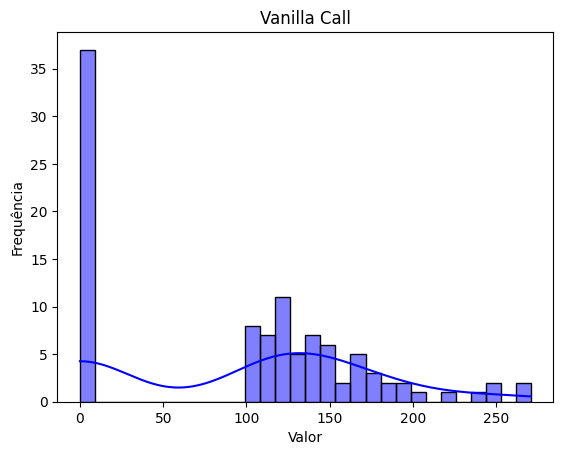

In [ ]:
# plotagem histograma t = T com seaborn
sns.histplot(vanillacall, kde=True, color="blue", bins=30)
# adicionando título e rótulos aos eixos
plt.title('Vanilla Call')
plt.xlabel('Valor')
plt.ylabel('Frequência')
# exibindo o gráfico
plt.show()